In [2]:
import matplotlib.pyplot as plt
import pandas
from math import pi
import openpyxl

## Data

In [3]:
data = pandas.read_csv('GRADEBOOK.txt',sep='\t')
print(data.shape[0],'students')
data.to_excel('GRADEBOOK.xlsx')
data

27 students


,Commits,Knowledge,Comprehension,Application,Analysis,Synthesis,Evaluation
0,24,5.00,4.30,247,8,7,1
1,24,4.50,3.80,247,8,7,1
2,24,3.50,4.50,247,8,7,0
3,26,5.00,4.70,329,29,9,0
4,26,5.00,4.50,329,29,9,0
5,31,4.75,3.05,18,8,6,1
6,31,5.00,3.10,18,8,6,0
7,35,4.50,3.20,184,5,7,1
8,36,5.00,2.90,170,12,7,0
9,36,5.00,4.50,170,12,7,0


## Traditional vs CSCL

In [4]:
mydf = data.copy()
mydf.loc[mydf.Commits<=50,'Groups']='Traditional'
mydf.loc[mydf.Commits>50,'Groups']='CSCL'
mydf

,Commits,Knowledge,Comprehension,Application,Analysis,Synthesis,Evaluation,Groups
0,24,5.00,4.30,247,8,7,1,Traditional
1,24,4.50,3.80,247,8,7,1,Traditional
2,24,3.50,4.50,247,8,7,0,Traditional
3,26,5.00,4.70,329,29,9,0,Traditional
4,26,5.00,4.50,329,29,9,0,Traditional
5,31,4.75,3.05,18,8,6,1,Traditional
6,31,5.00,3.10,18,8,6,0,Traditional
7,35,4.50,3.20,184,5,7,1,Traditional
8,36,5.00,2.90,170,12,7,0,Traditional
9,36,5.00,4.50,170,12,7,0,Traditional


## Normalization

In [5]:
skills = ['Knowledge','Comprehension','Application','Analysis','Synthesis','Evaluation']
df = mydf.copy()
df = df[['Groups']+skills]
for skill in skills:
  df[skill] = 10*df[skill]/df[skill].max()
df

,Groups,Knowledge,Comprehension,Application,Analysis,Synthesis,Evaluation
0,Traditional,10.0,9.148936,5.717593,2.580645,7.0,10.0
1,Traditional,9.0,8.085106,5.717593,2.580645,7.0,10.0
2,Traditional,7.0,9.574468,5.717593,2.580645,7.0,0.0
3,Traditional,10.0,10.000000,7.615741,9.354839,9.0,0.0
4,Traditional,10.0,9.574468,7.615741,9.354839,9.0,0.0
5,Traditional,9.5,6.489362,0.416667,2.580645,6.0,10.0
6,Traditional,10.0,6.595745,0.416667,2.580645,6.0,0.0
7,Traditional,9.0,6.808511,4.259259,1.612903,7.0,10.0
8,Traditional,10.0,6.170213,3.935185,3.870968,7.0,0.0
9,Traditional,10.0,9.574468,3.935185,3.870968,7.0,0.0


## Means

In [6]:
mymean = df.groupby(by=['Groups']).mean()
mymean.reset_index(inplace=True)
mymean

,Groups,Knowledge,Comprehension,Application,Analysis,Synthesis,Evaluation
0,CSCL,9.0,9.209726,6.001984,5.529954,10.0,4.285714
1,Traditional,8.9,8.436170,4.909722,5.241935,8.0,3.500000


[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982989, 0.0]


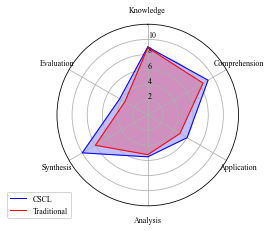

In [8]:
plt.rc("font",family="Times New Roman",size=8) 
fig = plt.figure(figsize=(3.34,3.34))
N = len(skills)
angles = [(n/N)*2*pi for n in range(N)]
angles += angles[:1]
print(angles)

ax = plt.subplot(111,polar=True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],skills,color='black')
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8,10],[2,4,6,8,10],color="black")
plt.ylim(0,12)

values=mymean.loc[0].drop(['Groups']).values.flatten().tolist()
values += values[:1]
ax.plot(angles,values,linewidth=1,linestyle='solid',color='blue',label='CSCL')
ax.fill(angles,values,color='blue',alpha=0.25)
values=mymean.loc[1].drop(['Groups']).values.flatten().tolist()
values += values[:1]
ax.plot(angles,values,linewidth=1,linestyle='solid',color='red',label='Traditional')
ax.fill(angles,values,color='red',alpha=0.25)


plt.legend(loc='upper right',bbox_to_anchor=(0.1,0.1),frameon=True) 
fig.savefig('Figure3.jpg',dpi=300)

plt.show()